# Additional dataset: Anemia Types Classification

##  Preparing the datasets


### Load the Data

In [1]:
import pandas as pd

data = pd.read_csv("data/dermatology_database_1.csv")

# Check the distribution of the target variable
print("\nDiagnosis Distribution:")
print(data['class'].value_counts())



Diagnosis Distribution:
class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


### Preprocess the Data
Diagnosis Encoding:
- Normal (Healthy) → 0
- Iron-Related Anemia → 1
- Non-Iron-Related Anemia → 2
- Blood Disorders → 3

Seperate features and Labels

In [3]:

import numpy as np

# Replace '?' in the 'age' column with NaN and convert to numeric
data['age'] = pd.to_numeric(data['age'].replace('?', np.nan))

# Handle missing values: Fill with the mean of the column
data['age'].fillna(data['age'].mean(), inplace=True)

# Separate features and labels
features = data.drop(columns=["class"]).values  # All columns except 'class'
labels = data["class"].values  # The 'class' column


/tmp/ipykernel_14138/3110363431.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [4]:
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Features shape: (366, 34)
Labels shape: (366,)


### Shuffle and Split the Dataset

In [5]:
from sklearn.model_selection import train_test_split

# Splits and stratification
proportions = [40, 60, 80, 90]
splits = {}
for prop in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=prop/100, stratify=labels, random_state=42
    )
    splits[f"{int(prop)}_{int(100-prop)}"] = (X_train, X_test, y_train, y_test)


### Visualize Class Distributions

Shortened Class Names:
- "Normal" remains the same.
- "Iron-Ana" for "Iron-Related Anemia".
- "Non-Iron" for "Non-Iron-Related Anemia".
- "Bld-Dis" for "Blood Disorders".

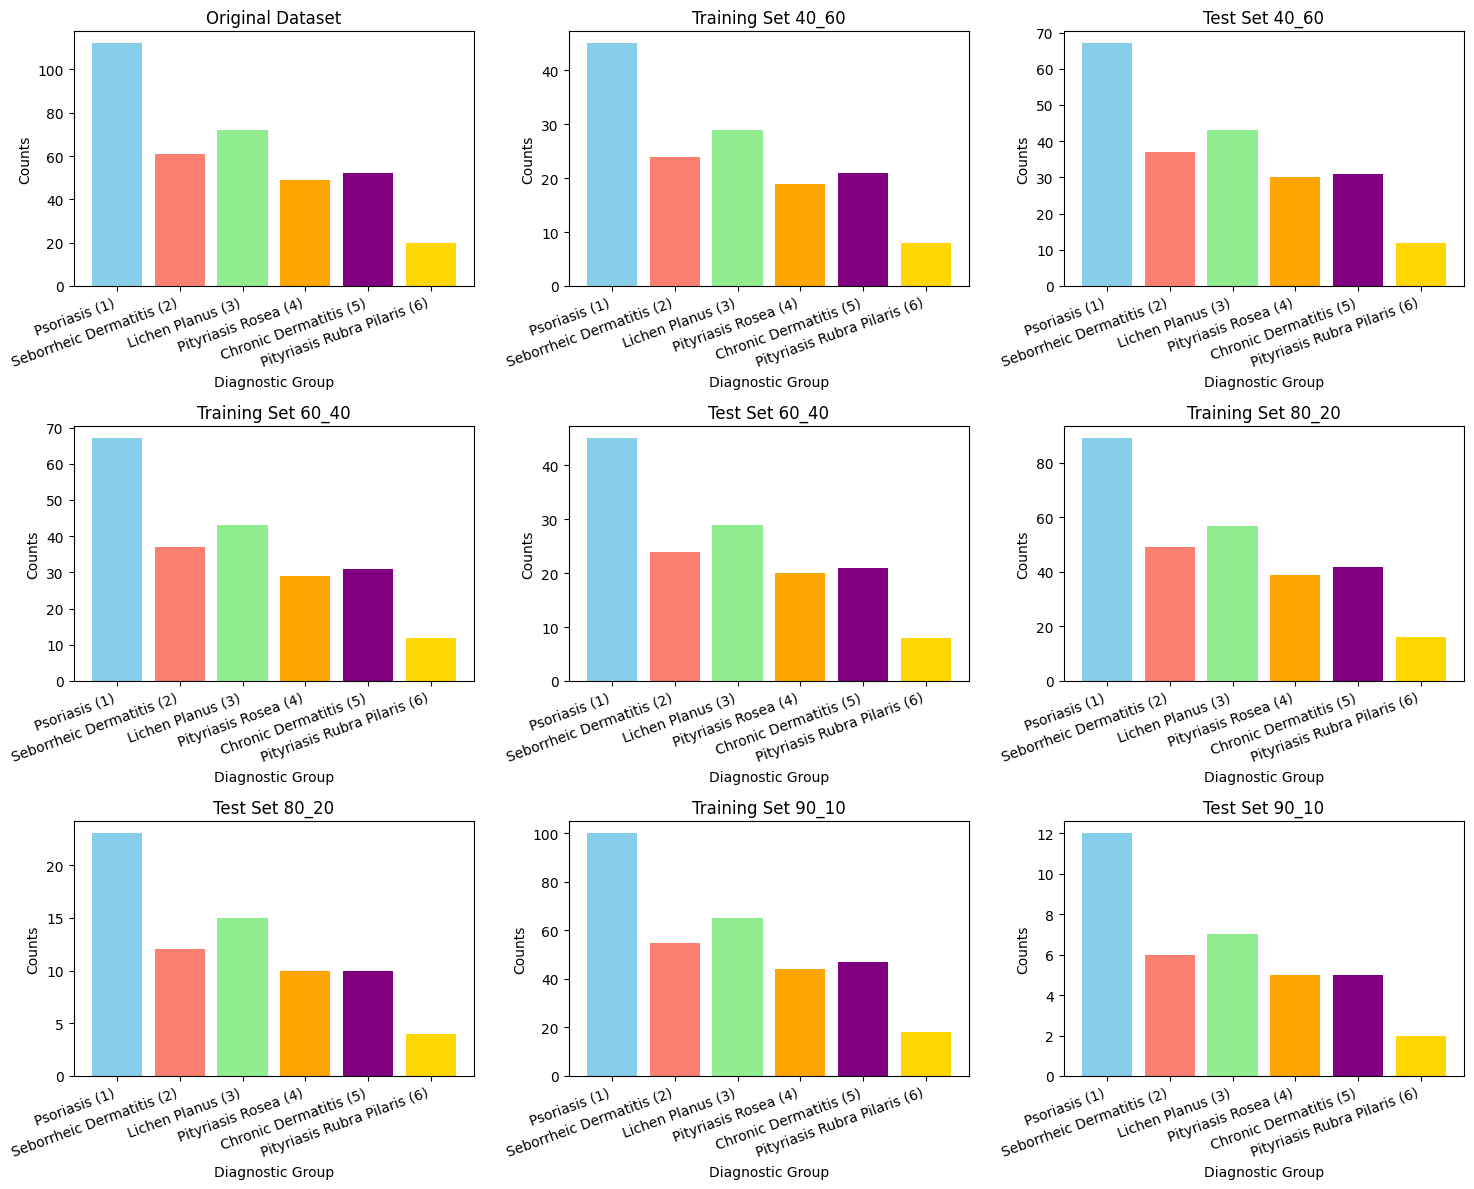

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(ax, title, data_labels):
    unique, counts = np.unique(data_labels, return_counts=True)
    
    # Updated class names to reflect the dermatology dataset
    class_names = ["Psoriasis (1)", "Seborrheic Dermatitis (2)", 
                   "Lichen Planus (3)", "Pityriasis Rosea (4)", 
                   "Chronic Dermatitis (5)", "Pityriasis Rubra Pilaris (6)"]
    
    # Plot the distribution
    ax.bar(class_names, counts, color=["skyblue", "salmon", "lightgreen", 
                                       "orange", "purple", "gold"])
    ax.set_title(title)
    ax.set_xlabel("Diagnostic Group")
    ax.set_ylabel("Counts")
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=20, ha="right")

      

# Number of splits
num_splits = len(splits)
total_plots = 1 + num_splits * 2  # Original + training + test sets
rows = (total_plots + 2) // 3  
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# original dataset
plot_distribution(axes[0], "Original Dataset", labels)

# each split
plot_idx = 1
for key, (X_train, X_test, y_train, y_test) in splits.items():
    plot_distribution(axes[plot_idx], f"Training Set {key}", y_train)
    plot_idx += 1
    plot_distribution(axes[plot_idx], f"Test Set {key}", y_test)
    plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


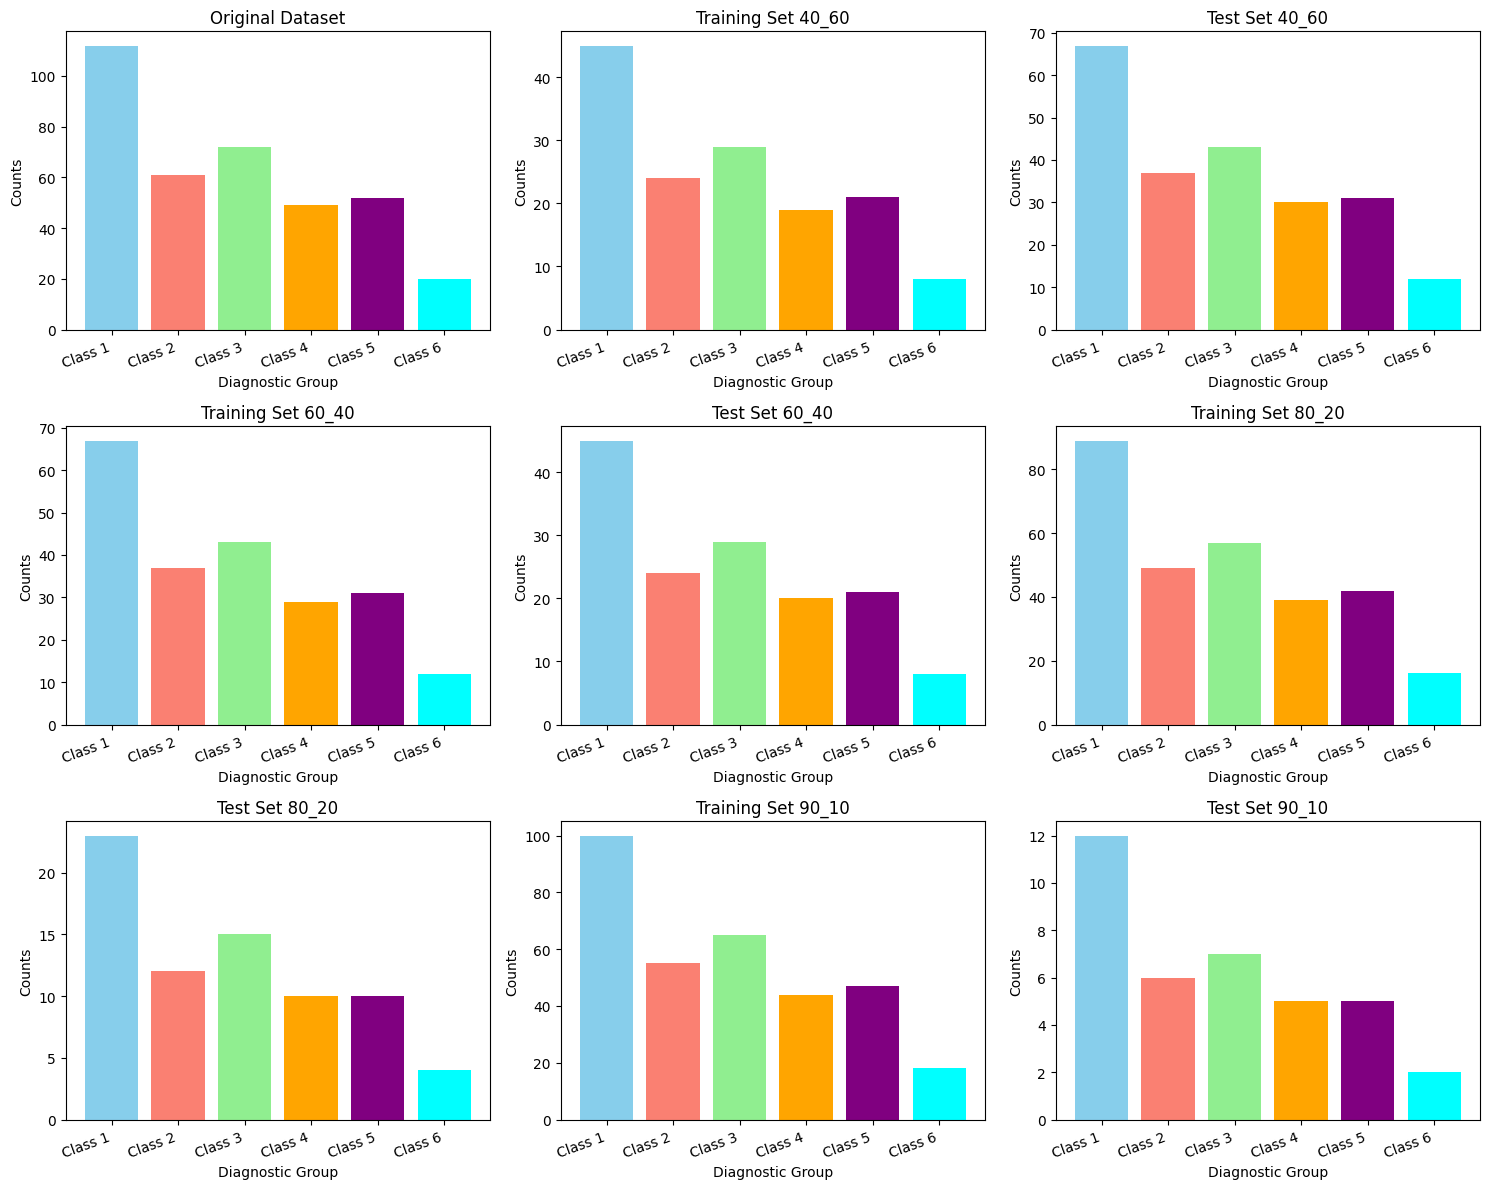

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(ax, title, data_labels):
    unique, counts = np.unique(data_labels, return_counts=True)
    class_names = [f"Class {int(cls)}" for cls in unique]  # Dynamically generate class names
    ax.bar(class_names, counts, color=["skyblue", "salmon", "lightgreen", "orange", "purple", "cyan"])
    ax.set_title(title)
    ax.set_xlabel("Diagnostic Group")
    ax.set_ylabel("Counts")
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=20, ha="right")


      

# Number of splits
num_splits = len(splits)
total_plots = 1 + num_splits * 2  # Original + training + test sets
rows = (total_plots + 2) // 3  
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# original dataset
plot_distribution(axes[0], "Original Dataset", labels)

# each split
plot_idx = 1
for key, (X_train, X_test, y_train, y_test) in splits.items():
    plot_distribution(axes[plot_idx], f"Training Set {key}", y_train)
    plot_idx += 1
    plot_distribution(axes[plot_idx], f"Test Set {key}", y_test)
    plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


## Building the decision tree classifiers

Decision Tree Graph for Split 40_60:


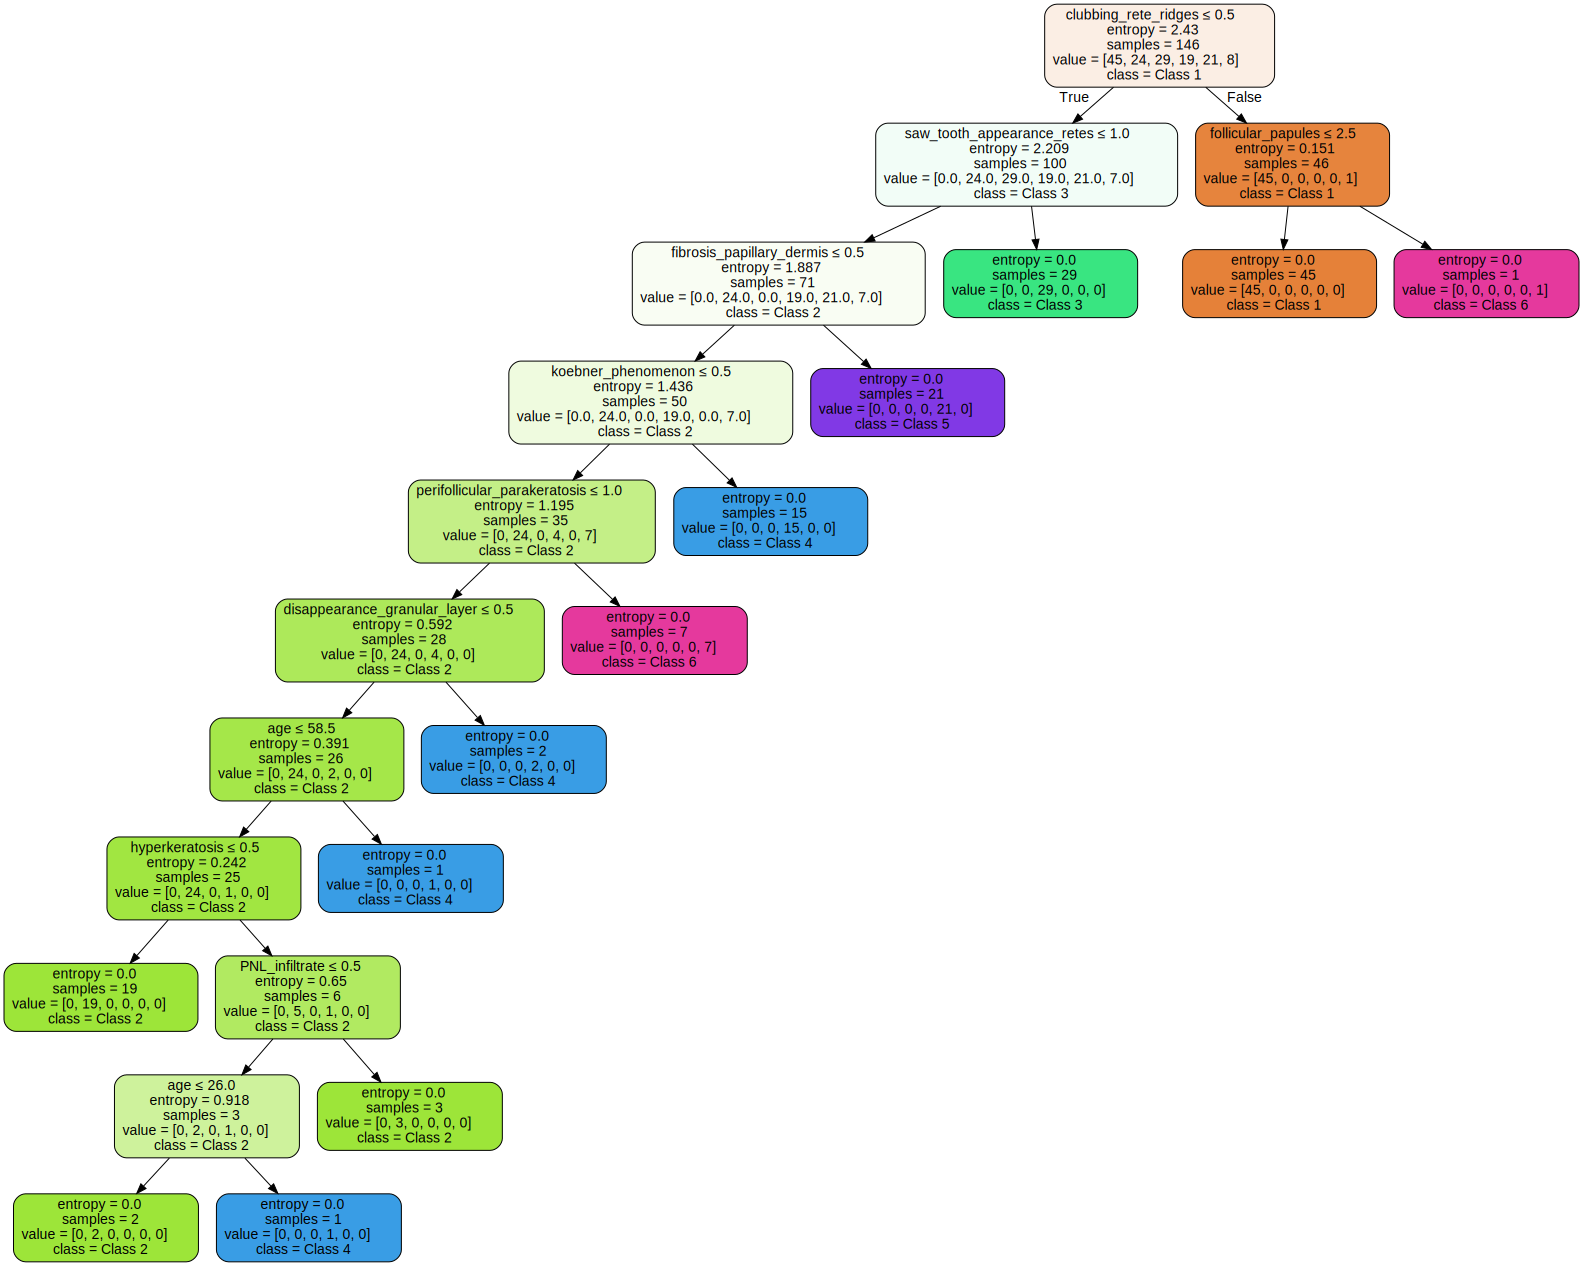

Classification Report for Split 40_60:
              precision    recall  f1-score   support

     Class 1       0.94      0.96      0.95        67
     Class 2       0.85      0.92      0.88        37
     Class 3       1.00      0.88      0.94        43
     Class 4       0.81      1.00      0.90        30
     Class 5       1.00      0.90      0.95        31
     Class 6       1.00      0.75      0.86        12

    accuracy                           0.92       220
   macro avg       0.93      0.90      0.91       220
weighted avg       0.93      0.92      0.92       220



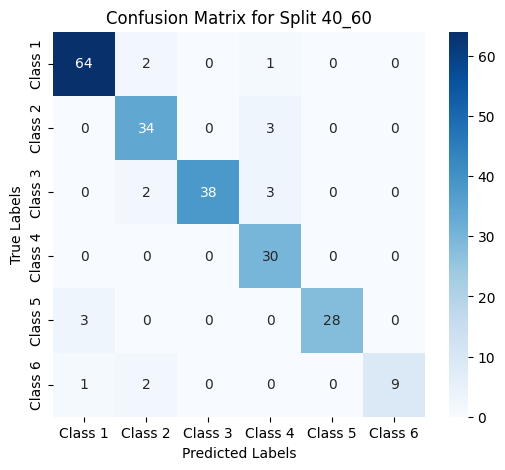

Decision Tree Graph for Split 60_40:


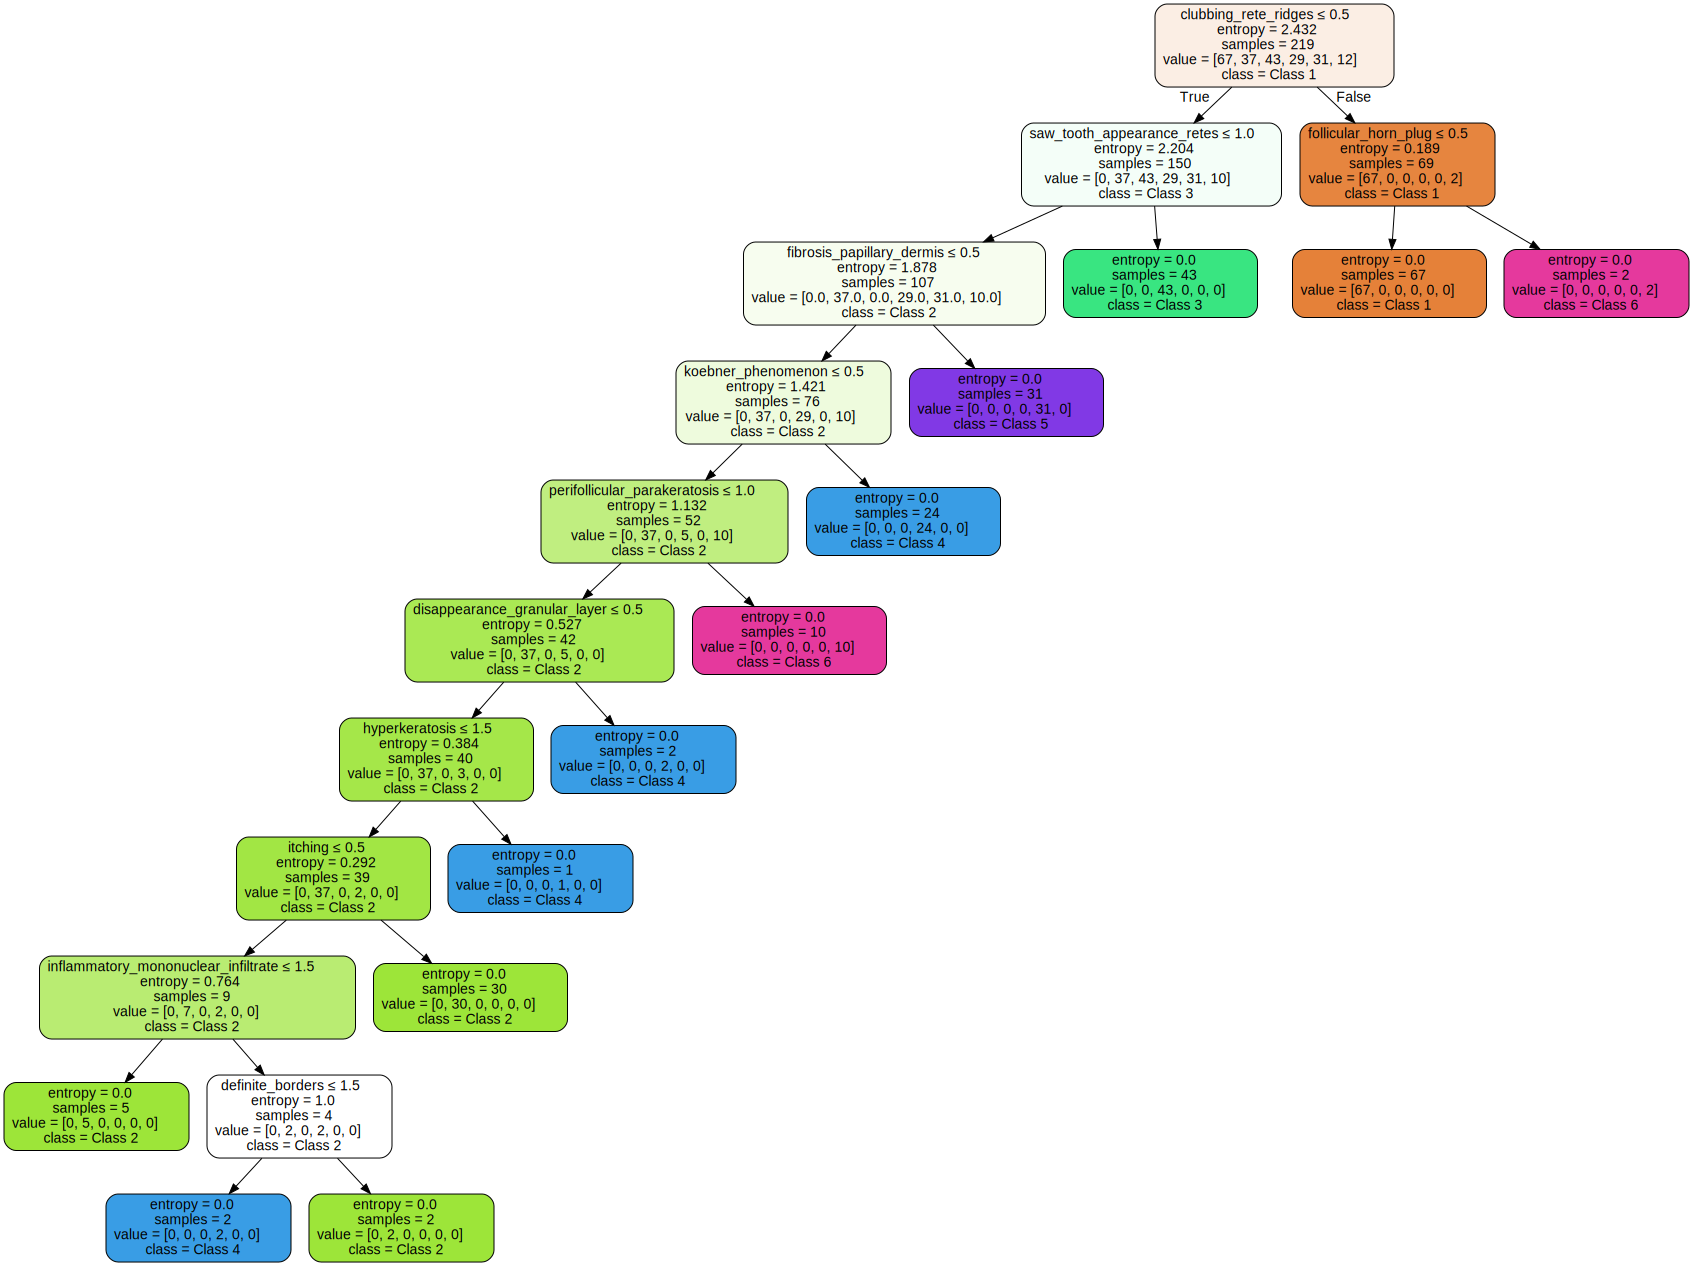

Classification Report for Split 60_40:
              precision    recall  f1-score   support

     Class 1       0.93      0.93      0.93        45
     Class 2       0.78      0.88      0.82        24
     Class 3       1.00      0.83      0.91        29
     Class 4       0.74      1.00      0.85        20
     Class 5       1.00      0.86      0.92        21
     Class 6       1.00      0.75      0.86         8

    accuracy                           0.89       147
   macro avg       0.91      0.87      0.88       147
weighted avg       0.91      0.89      0.89       147



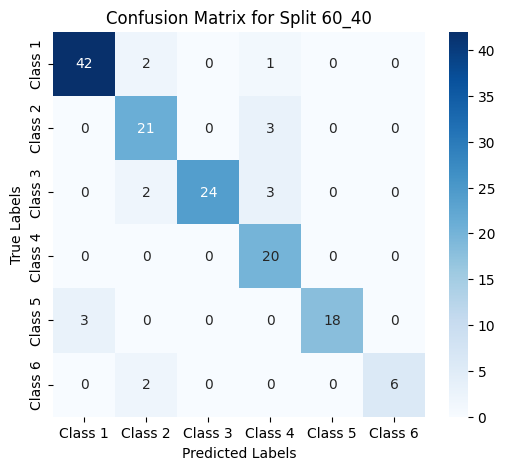

Decision Tree Graph for Split 80_20:


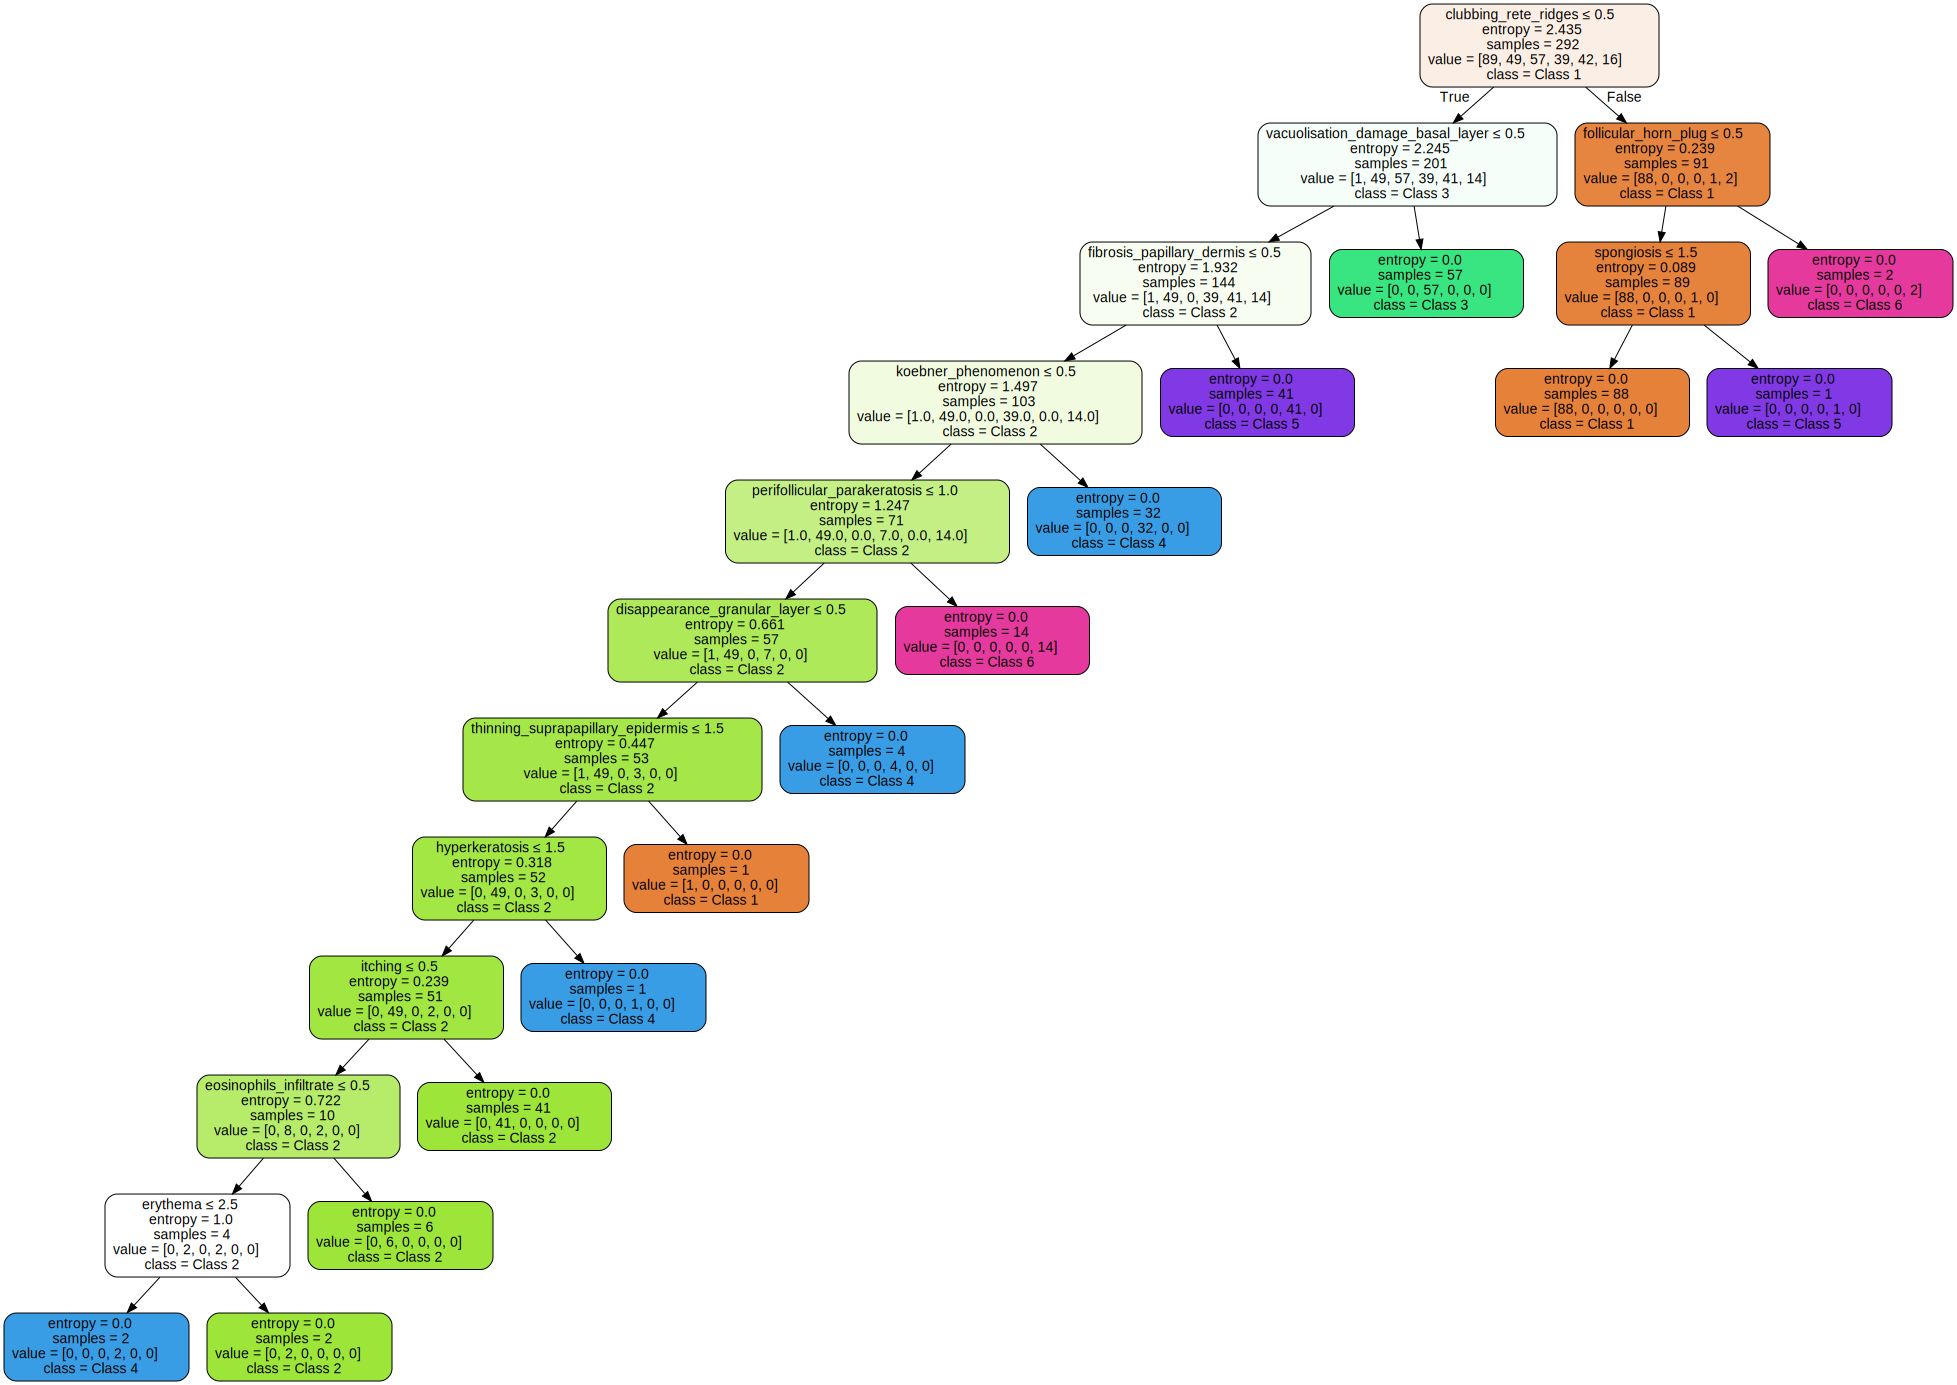

Classification Report for Split 80_20:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        23
     Class 2       0.90      0.75      0.82        12
     Class 3       1.00      0.93      0.97        15
     Class 4       0.71      1.00      0.83        10
     Class 5       0.91      1.00      0.95        10
     Class 6       1.00      0.50      0.67         4

    accuracy                           0.92        74
   macro avg       0.92      0.86      0.87        74
weighted avg       0.93      0.92      0.92        74



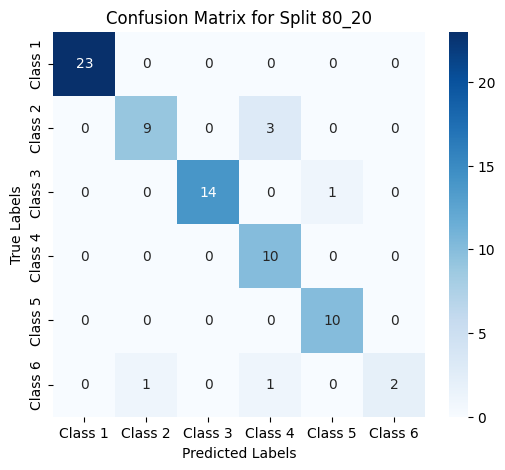

Decision Tree Graph for Split 90_10:


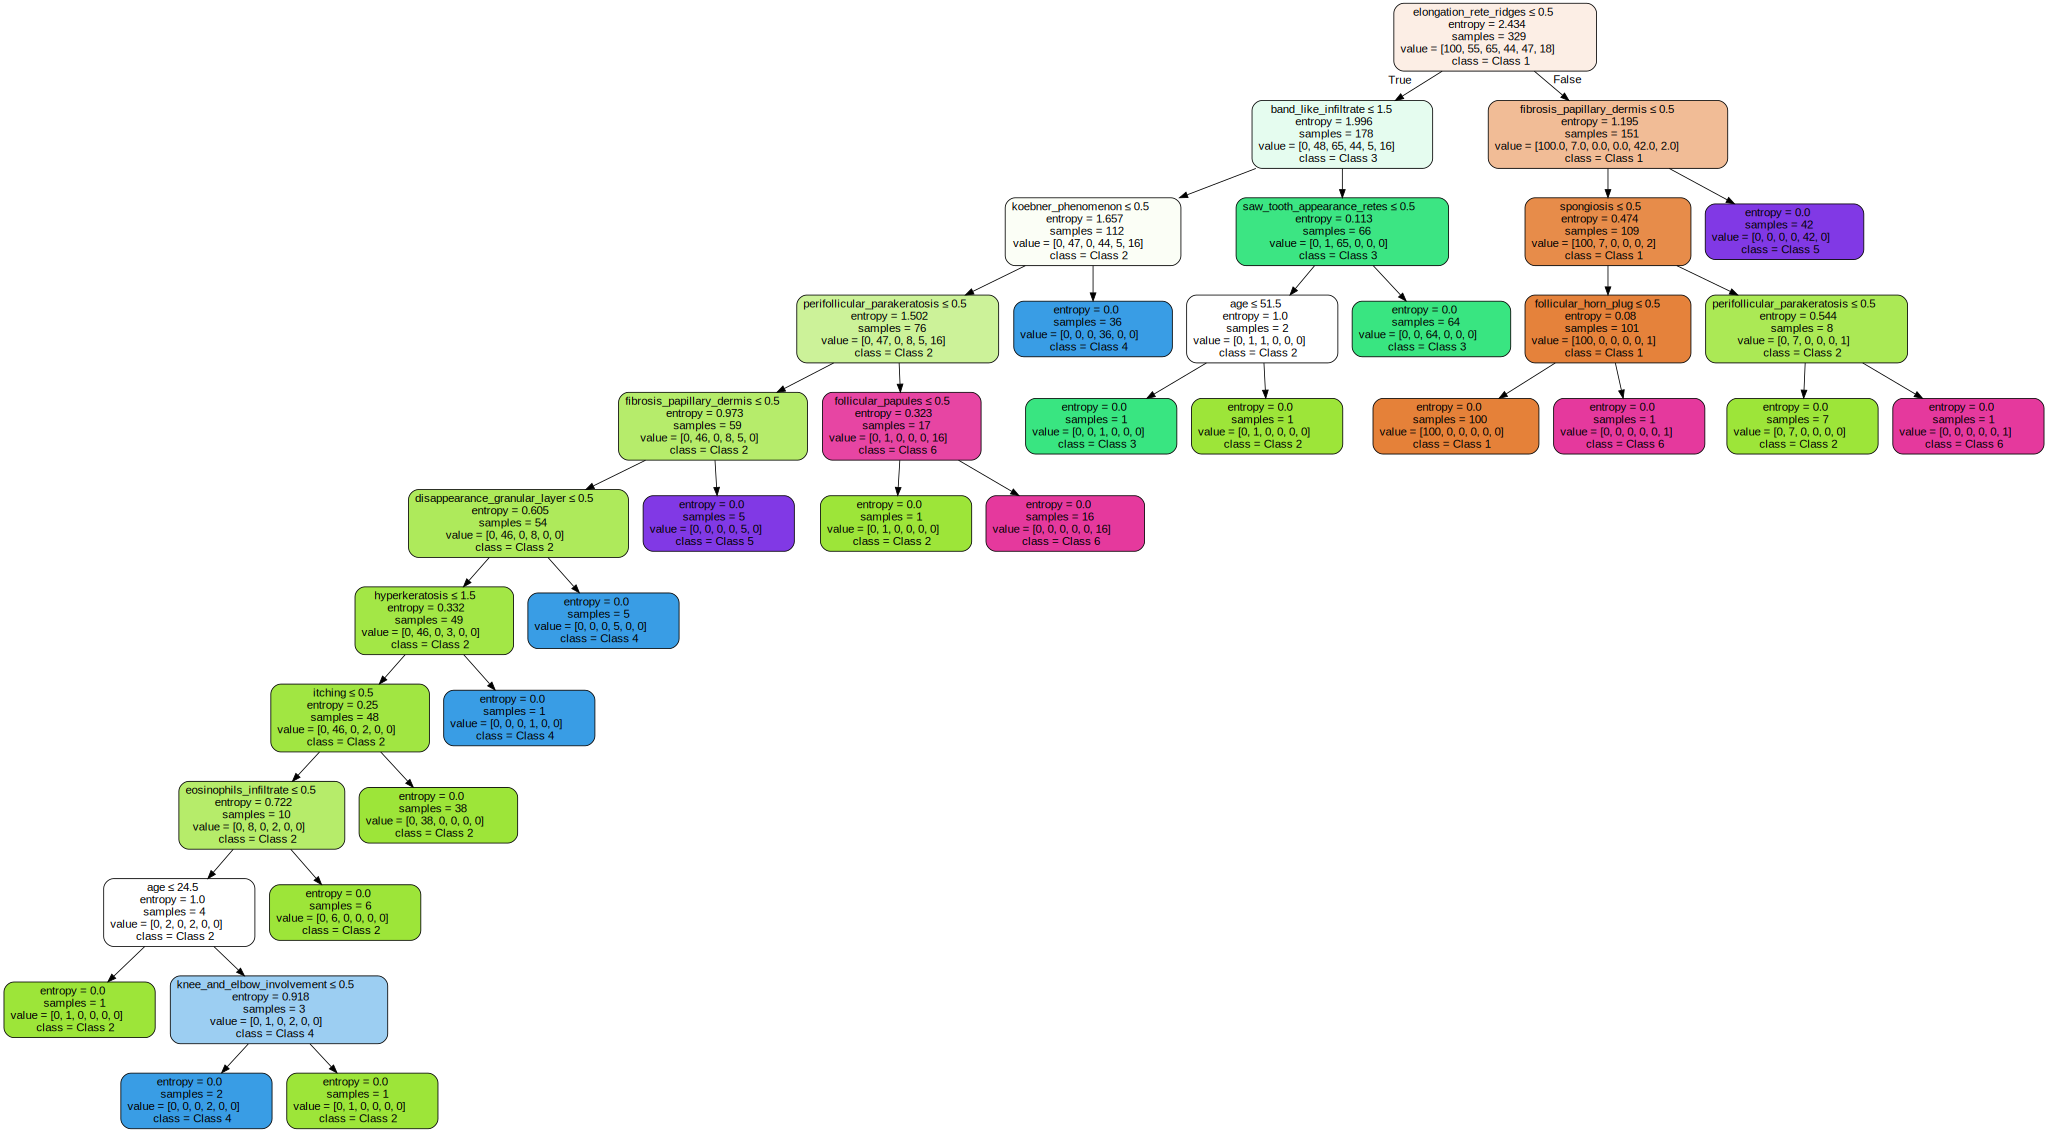

Classification Report for Split 90_10:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        12
     Class 2       1.00      0.83      0.91         6
     Class 3       1.00      1.00      1.00         7
     Class 4       0.83      1.00      0.91         5
     Class 5       1.00      1.00      1.00         5
     Class 6       1.00      1.00      1.00         2

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.98      0.97      0.97        37



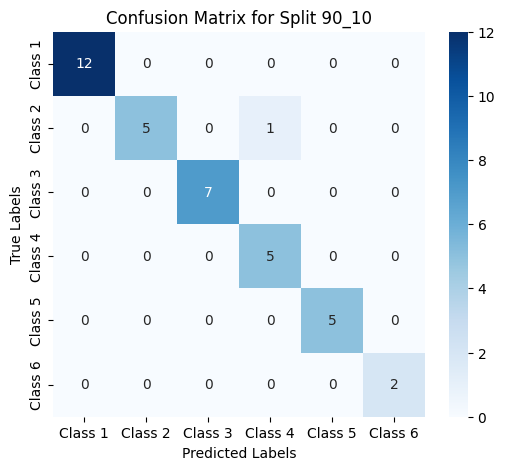

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dynamically get the class names from the unique labels in the dataset
class_names = [f"Class {int(cls)}" for cls in np.unique(data["class"])]

for key, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Export the decision tree
    dot_data = export_graphviz(
        clf, 
        out_file=None,  
        feature_names=data.drop(columns=["class"]).columns, 
        class_names=class_names,  # Use dynamically generated class names
        filled=True,  
        rounded=True,  
        special_characters=True
    )
    
    graph = graphviz.Source(dot_data)
    graph.render(f"plots/dataset32/decision_tree_{key}", format="png")
    
    # View graph
    print(f"Decision Tree Graph for Split {key}:")
    display(graph)

    # Classification report
    y_pred = clf.predict(X_test)
    print(f"Classification Report for Split {key}:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt="d", 
        cmap="Blues", 
        xticklabels=class_names, 
        yticklabels=class_names
    )
    plt.title(f"Confusion Matrix for Split {key}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [7]:
%%script echo skipping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a figure for the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust grid size as needed
fig.suptitle("Confusion Matrices for All Splits", fontsize=16)

# Train and evaluate decision trees for all splits
for i, (key, (X_train, X_test, y_train, y_test)) in enumerate(splits.items()):
    # Train the decision tree classifier using information gain (entropy)
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Generate and print classification report
    print(f"Classification Report for Split {key}:")
    print(classification_report(y_test, y_pred, target_names=["Normal", "Iron-Ana", "Non-Iron", "Bld-Dis"]))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix in a subplot
    ax = axes[i // 2, i % 2]  # Determine subplot position
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Normal", "Iron-Ana", "Non-Iron", "Bld-Dis"], yticklabels=["Normal", "Iron-Ana", "Non-Iron", "Bld-Dis"],
        ax=ax
    )
    ax.set_title(f"Split {key}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve space for the main title
plt.show()


skipping


## The depth and accuracy of a decision tree

Decision Tree Graph for Max Depth None:


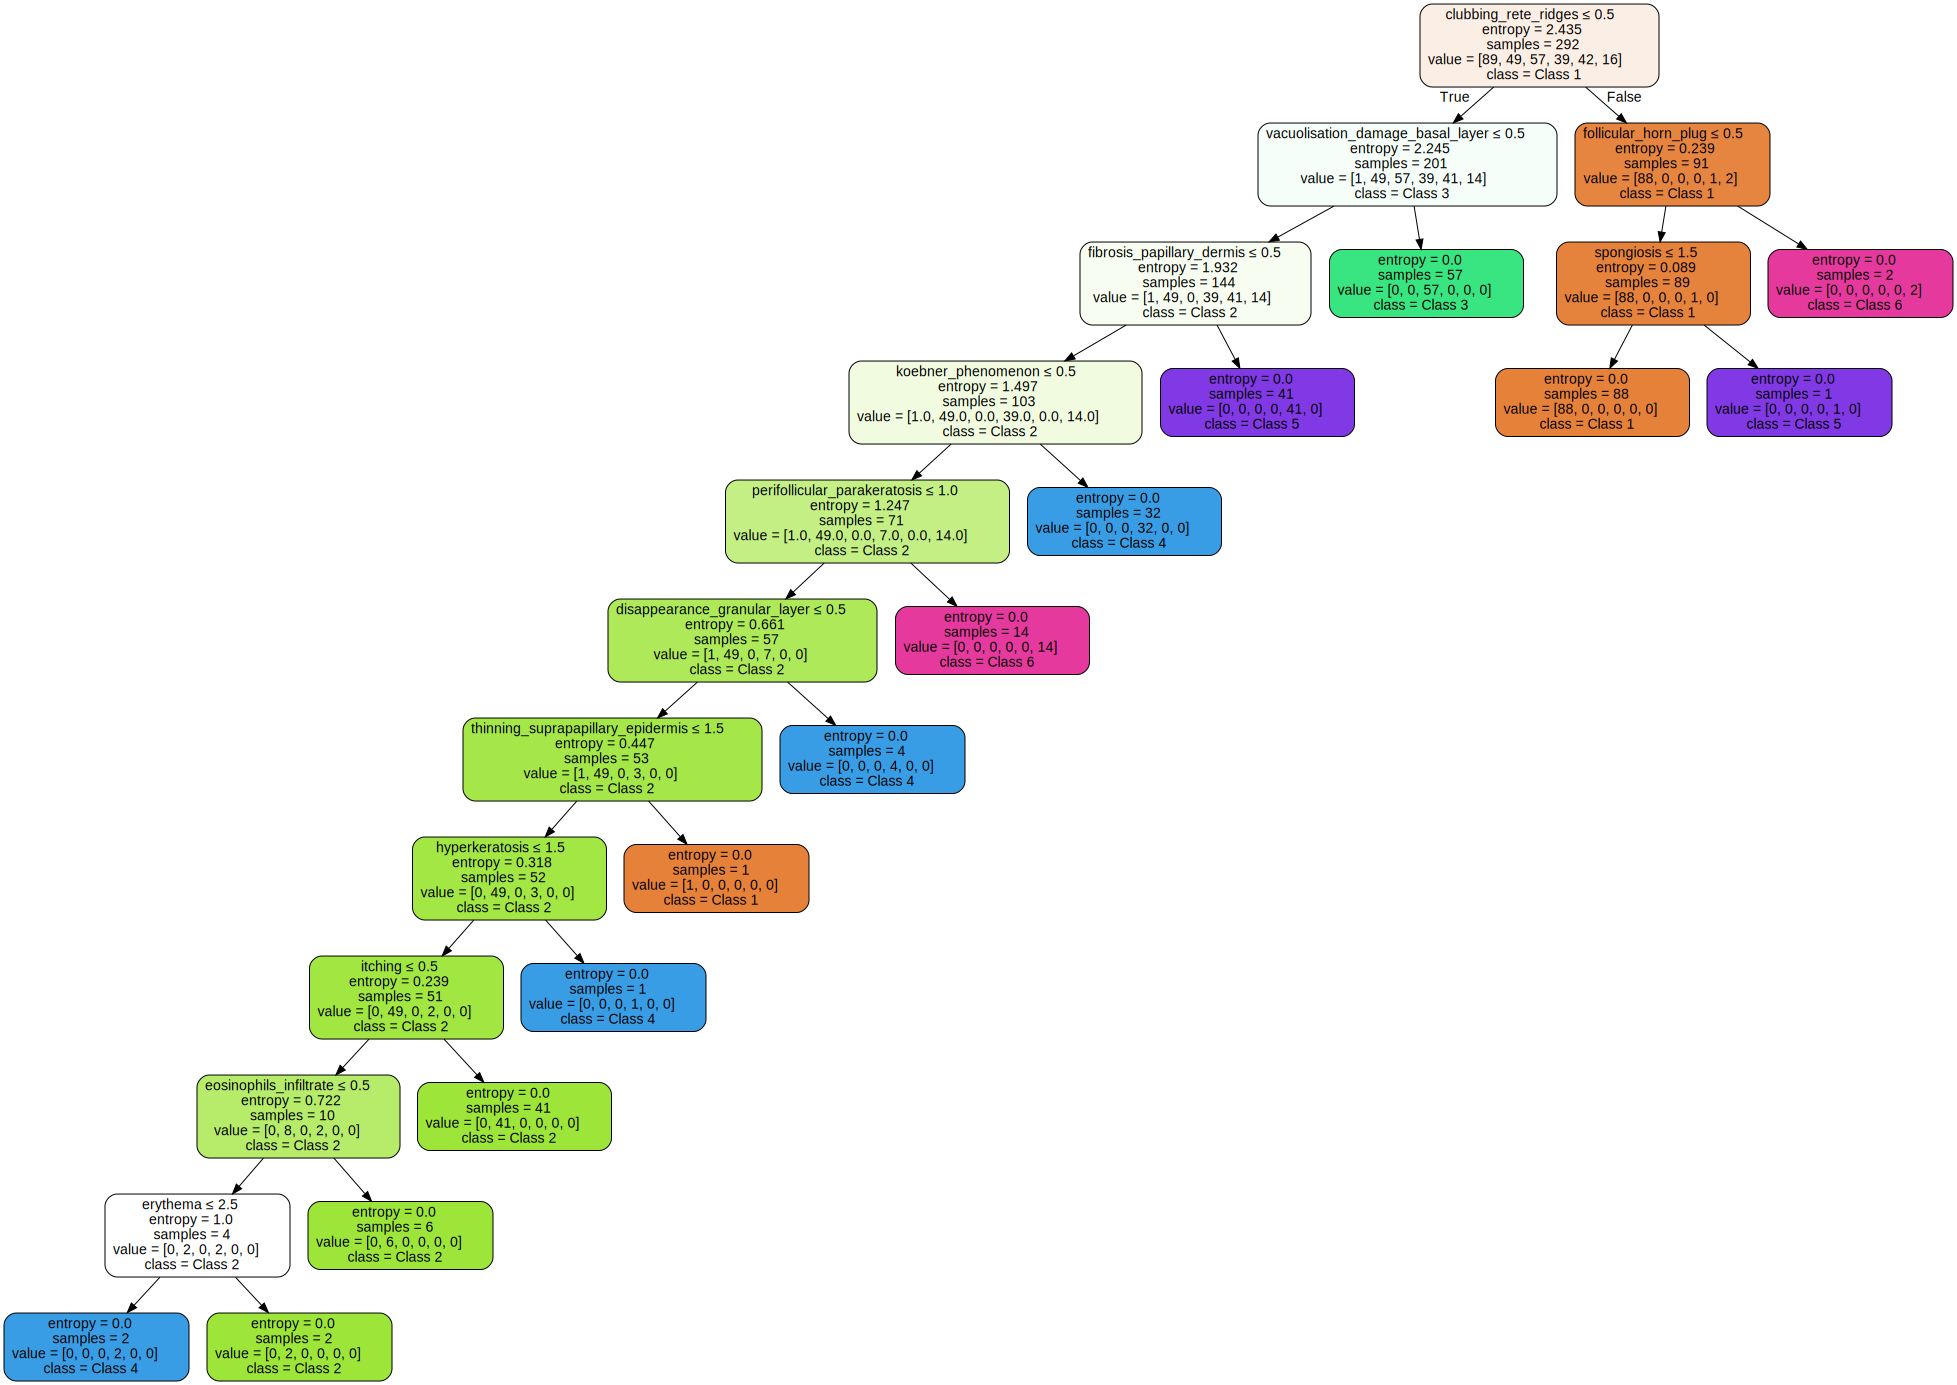

Decision Tree Graph for Max Depth 2:


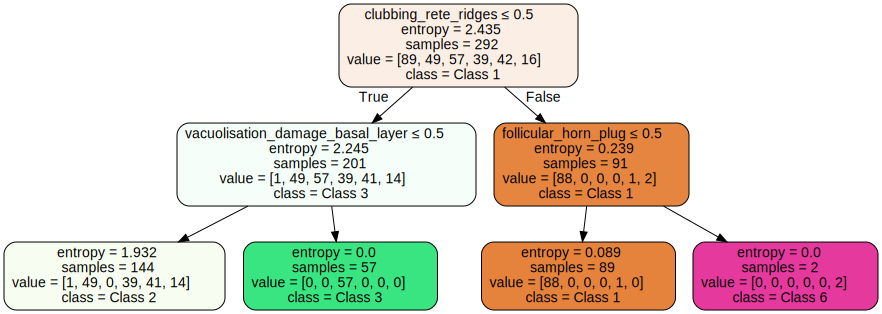

Decision Tree Graph for Max Depth 3:


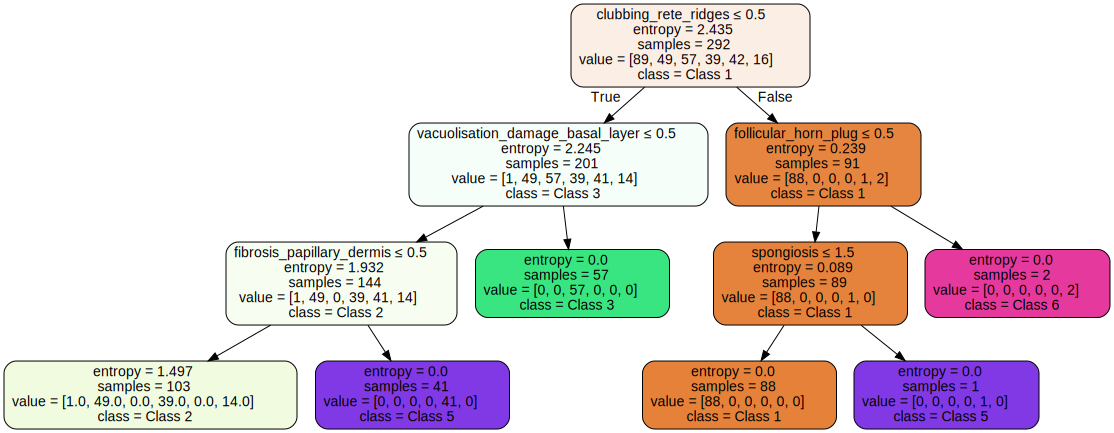

Decision Tree Graph for Max Depth 4:


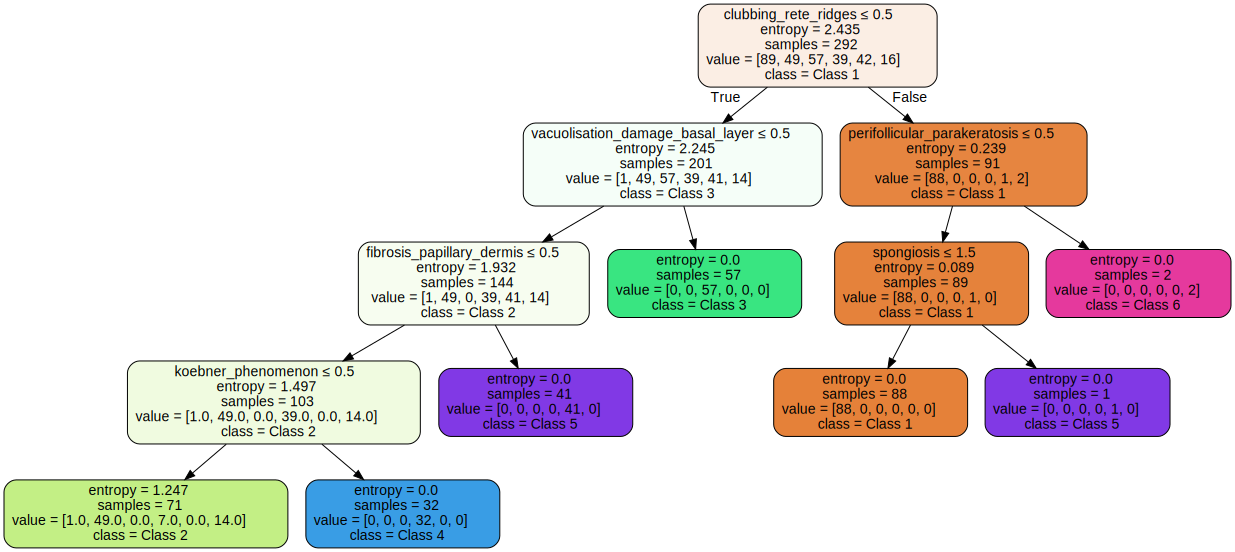

Decision Tree Graph for Max Depth 5:


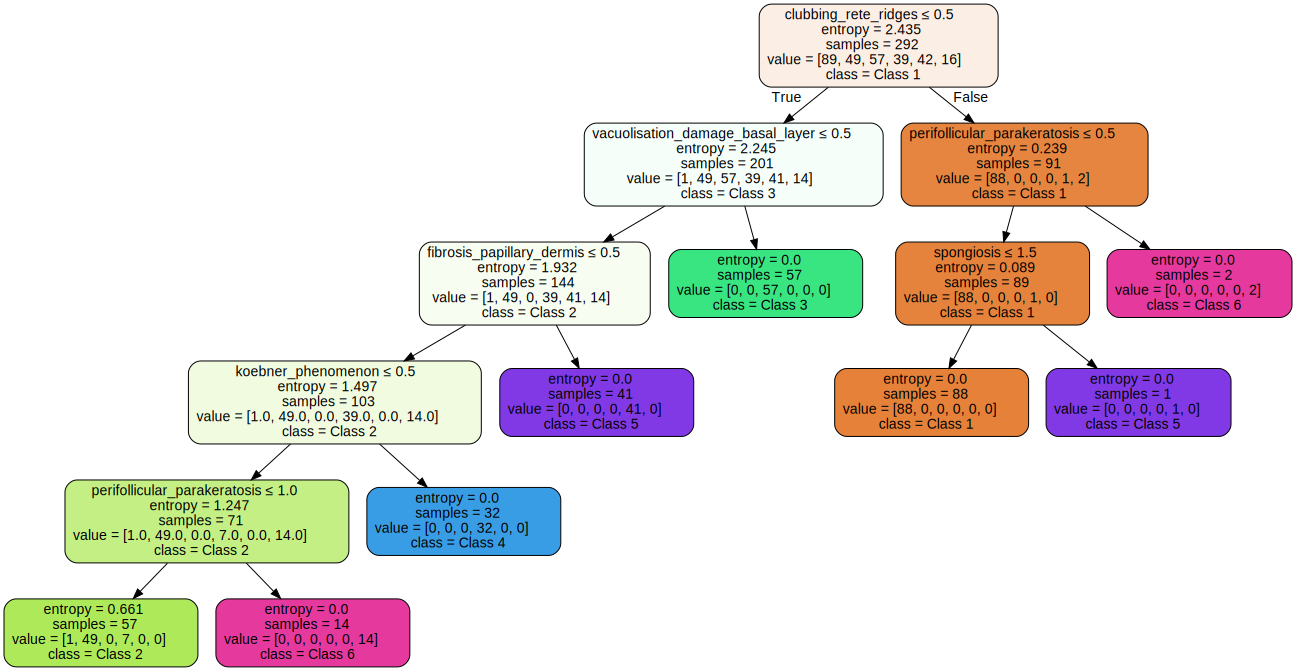

Decision Tree Graph for Max Depth 6:


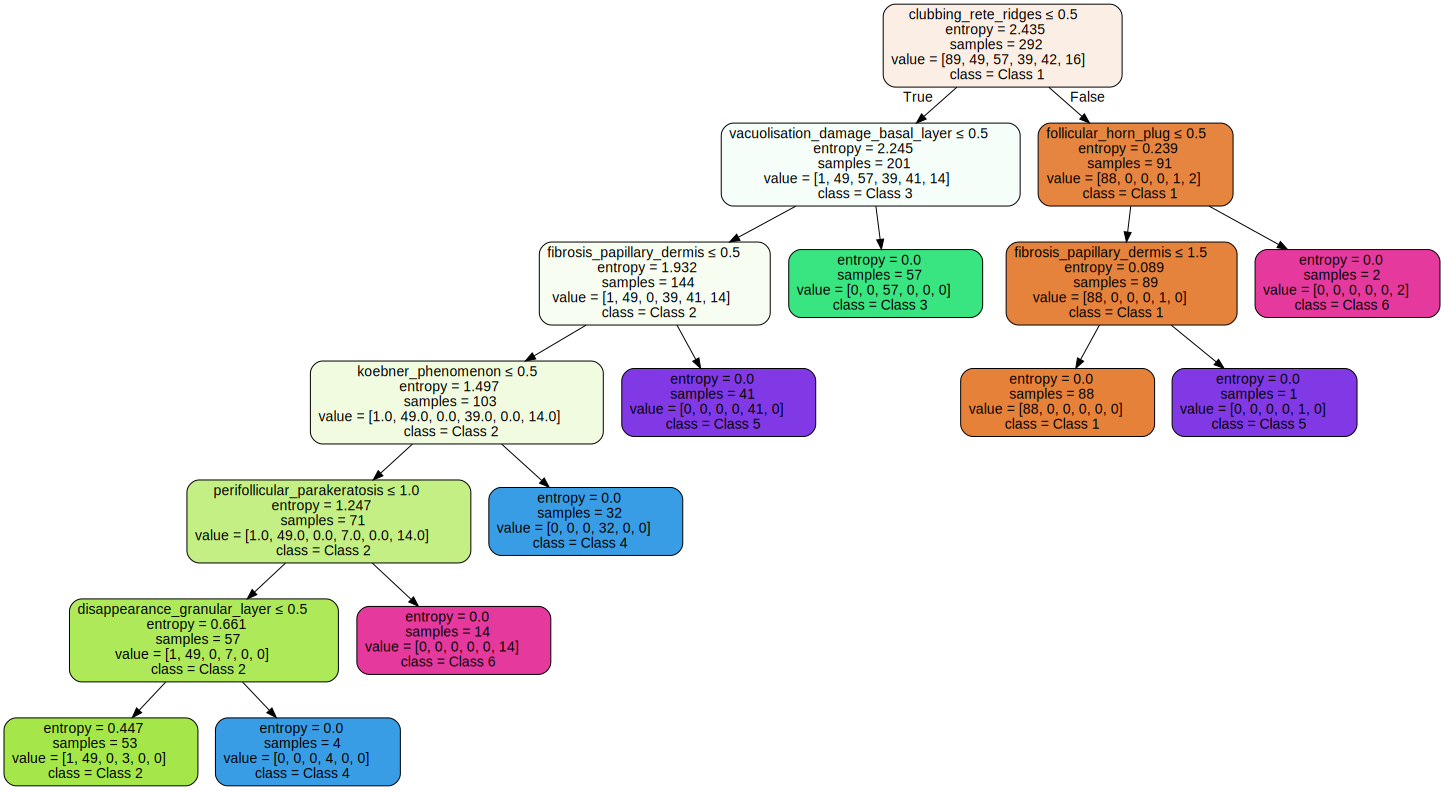

Decision Tree Graph for Max Depth 7:


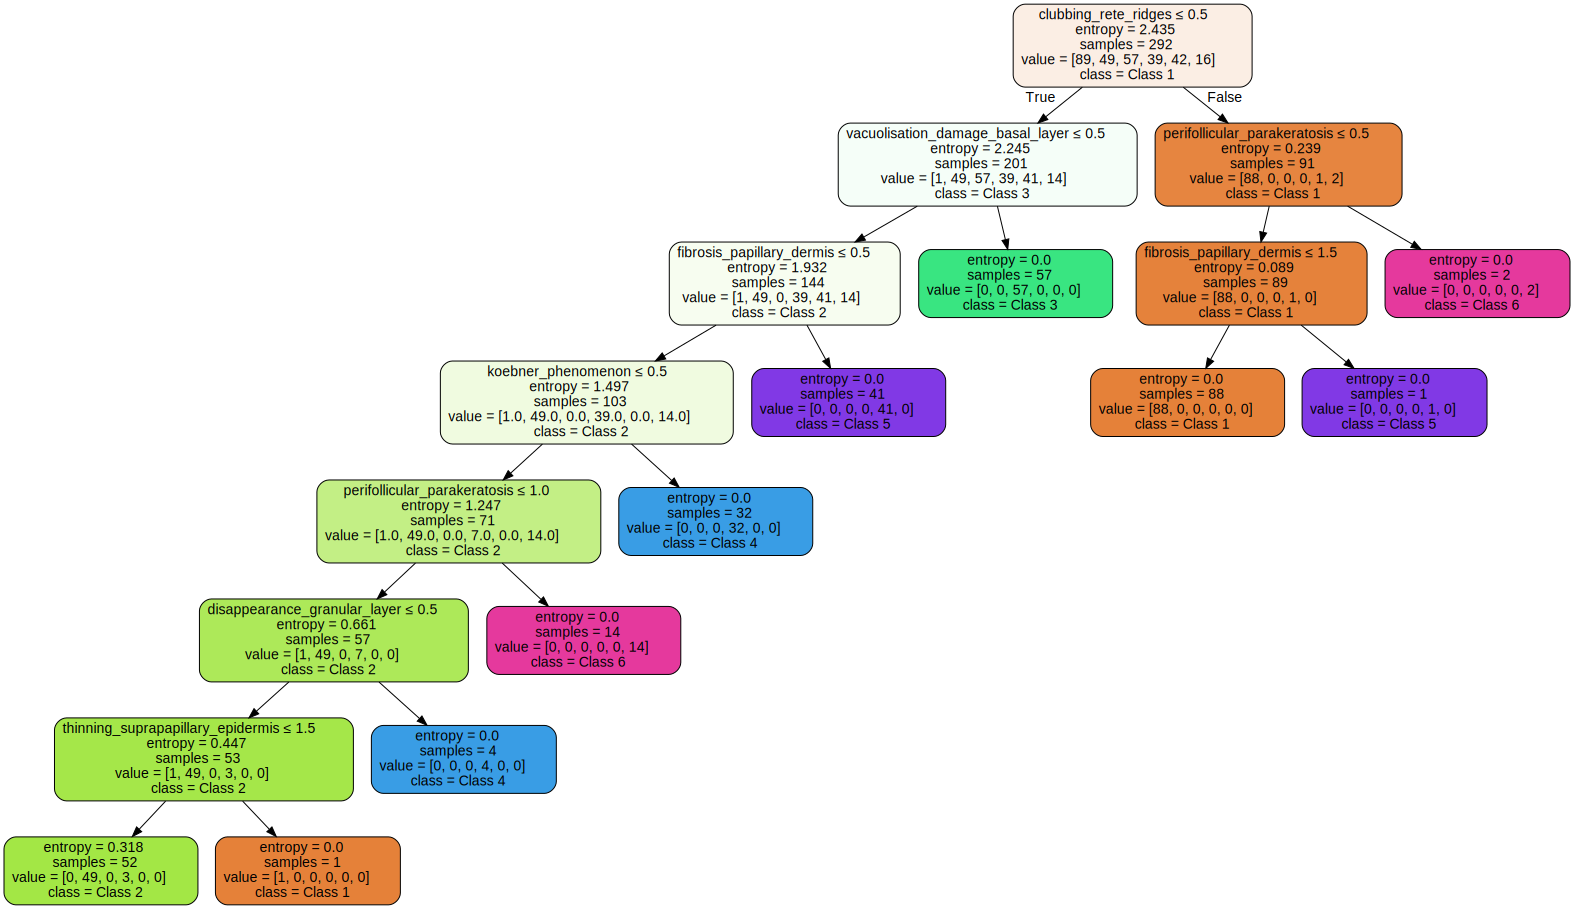

Max Depth Accuracy
None      0.9189
2         0.6351
3         0.7703
4         0.8649
5         0.8919
6         0.9189
7         0.9459


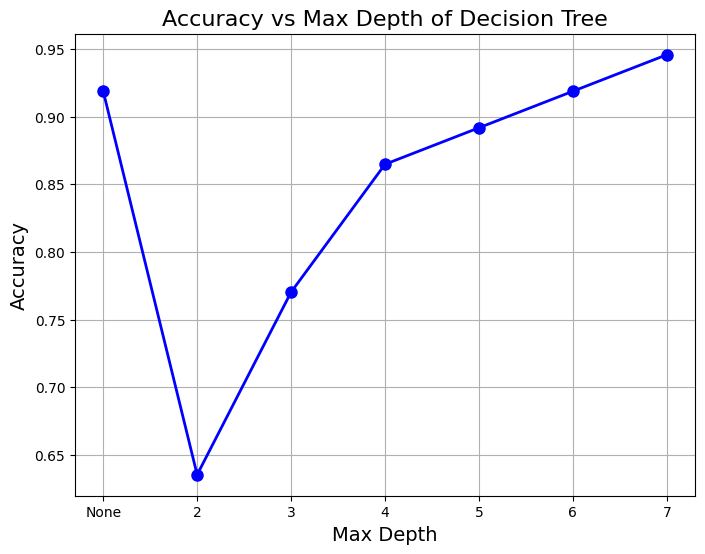

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Train and evaluate decision trees for max_depth values: None, 2, 3, 4, 5, 6, 7
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []

# Prepare data (use 80/20 split)
X_train, X_test, y_train, y_test = splits["80_20"]

for max_depth in max_depth_values:
    # Train the decision tree classifier with the specified max_depth
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Export the tree to Graphviz format
    dot_data = export_graphviz(
        clf, 
        out_file=None,  # Output to string (DOT format)
        feature_names=data.drop(columns=["class"]).columns,  # Feature names
        class_names=class_names,  # Target classes
        filled=True,  # Colorize nodes
        rounded=True,  # Rounded corners
        special_characters=True
    )


    graph = graphviz.Source(dot_data)
    graph.render(f"plots/dataset32/decision_tree_max_depth_{max_depth}", format="png") 
    print(f"Decision Tree Graph for Max Depth {max_depth}:")
    display(graph)

# Report the accuracy scores in a formatted table
print(f"{'Max Depth':<10}{'Accuracy'}")
for depth, accuracy in zip(max_depth_values, accuracy_scores):
    depth_str = "None" if depth is None else depth
    print(f"{depth_str:<10}{accuracy:.4f}")

# Plot the accuracy vs max_depth
plt.figure(figsize=(8, 6))
plt.plot([str(d) if d is not None else "None" for d in max_depth_values], accuracy_scores, 
         marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Max Depth of Decision Tree", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()